### Analysis top-ranked B.Tech/Medical/MBA colleges based on their Fee structure and Placement statistics.

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### Read csv file

In [118]:
college_data = pd.read_csv(r'C:\Users\hp\shiksha_college_data.csv')
college_data.head()

,NIRF_Rank,Institute,Placements_rating,Infrastructure_rating,Faculty_Course_Curriculum_rating,Crowd_Campus_Life_rating,Value_for_Money_rating,Learning_Experience_rating,Total_Reviews,Fees,Salary,Courses
0,1,IIT Madras - Indian Institute of Technology4.,4.4,4.4,4.5,4.6,4.7,4.6,337.0,₹ 10.00 LakhSalary,₹ 19.00 Lakh Not RankedIndia Today,B.Tech
1,2,IIT Delhi - Indian Institute of Technology4.,4.4,4.4,4.3,4.6,4.6,0.0,614.0,₹ 8.00 LakhSalary,₹ 20.00 Lakh 1India Today,B.Tech
2,3,IIT Bombay - Indian Institute of Technology4.,4.6,4.6,4.5,4.7,4.7,5.0,436.0,₹ 8.00 LakhSalary,₹ 17.92 Lakh 2India Today,B.Tech
3,4,IIT Kanpur - Indian Institute of Technology4.,4.5,4.7,4.5,4.8,4.7,0.0,394.0,₹ 8.00 LakhSalary,₹ 19.40 Lakh 3India Today,B.Tech
4,5,IIT Kharagpur - Indian Institute of Technology4.,4.4,4.4,4.3,4.7,4.5,0.0,593.0,₹ 8.00 LakhSalary,₹ 19.76 Lakh 4India Today,B.Tech


In [120]:
college_data.shape

(428, 12)

In [122]:
rows, columns = college_data.shape

In [124]:
# number of rows
rows  

428

In [126]:
# number of columns
columns

12

In [128]:
college_data.columns

Index(['NIRF_Rank', 'Institute', 'Placements_rating', 'Infrastructure_rating',
       'Faculty_Course_Curriculum_rating', 'Crowd_Campus_Life_rating',
       'Value_for_Money_rating', 'Learning_Experience_rating', 'Total_Reviews',
       'Fees', 'Salary', 'Courses'],
      dtype='object')

In [130]:
# Display data types of each column
college_data.dtypes

NIRF_Rank                             int64
Institute                            object
Placements_rating                   float64
Infrastructure_rating               float64
Faculty_Course_Curriculum_rating    float64
Crowd_Campus_Life_rating            float64
Value_for_Money_rating              float64
Learning_Experience_rating          float64
Total_Reviews                       float64
Fees                                 object
Salary                               object
Courses                              object
dtype: object

In [132]:
# Count and display missing values for each column
college_data.isnull().sum()

NIRF_Rank                             0
Institute                             2
Placements_rating                     2
Infrastructure_rating                 2
Faculty_Course_Curriculum_rating      2
Crowd_Campus_Life_rating              2
Value_for_Money_rating                2
Learning_Experience_rating            2
Total_Reviews                         3
Fees                                 28
Salary                              141
Courses                               0
dtype: int64

In [134]:
college_data.describe()

,NIRF_Rank,Placements_rating,Infrastructure_rating,Faculty_Course_Curriculum_rating,Crowd_Campus_Life_rating,Value_for_Money_rating,Learning_Experience_rating,Total_Reviews
count,428.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,425.000000
mean,125.542056,4.009155,4.157277,4.153991,4.230047,4.131690,0.484038,402.477647
std,97.829683,0.369719,0.349327,0.262827,0.309441,0.319198,1.406699,571.889029
min,1.000000,2.600000,2.600000,3.000000,2.900000,3.100000,0.000000,2.000000
25%,39.000000,3.800000,3.900000,4.000000,4.100000,3.900000,0.000000,70.000000
50%,91.500000,4.000000,4.200000,4.100000,4.300000,4.100000,0.000000,225.000000
75%,200.000000,4.300000,4.400000,4.300000,4.400000,4.300000,0.000000,566.000000
max,300.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4725.000000


In [136]:
college_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NIRF_Rank                         428 non-null    int64  
 1   Institute                         426 non-null    object 
 2   Placements_rating                 426 non-null    float64
 3   Infrastructure_rating             426 non-null    float64
 4   Faculty_Course_Curriculum_rating  426 non-null    float64
 5   Crowd_Campus_Life_rating          426 non-null    float64
 6   Value_for_Money_rating            426 non-null    float64
 7   Learning_Experience_rating        426 non-null    float64
 8   Total_Reviews                     425 non-null    float64
 9   Fees                              400 non-null    object 
 10  Salary                            287 non-null    object 
 11  Courses                           428 non-null    object 
dtypes: float

#### Data cleaning

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [138]:
# Load the CSV file
college_data = pd.read_csv(r'C:\Users\hp\shiksha_college_data.csv')
college_data.head()

,NIRF_Rank,Institute,Placements_rating,Infrastructure_rating,Faculty_Course_Curriculum_rating,Crowd_Campus_Life_rating,Value_for_Money_rating,Learning_Experience_rating,Total_Reviews,Fees,Salary,Courses
0,1,IIT Madras - Indian Institute of Technology4.,4.4,4.4,4.5,4.6,4.7,4.6,337.0,₹ 10.00 LakhSalary,₹ 19.00 Lakh Not RankedIndia Today,B.Tech
1,2,IIT Delhi - Indian Institute of Technology4.,4.4,4.4,4.3,4.6,4.6,0.0,614.0,₹ 8.00 LakhSalary,₹ 20.00 Lakh 1India Today,B.Tech
2,3,IIT Bombay - Indian Institute of Technology4.,4.6,4.6,4.5,4.7,4.7,5.0,436.0,₹ 8.00 LakhSalary,₹ 17.92 Lakh 2India Today,B.Tech
3,4,IIT Kanpur - Indian Institute of Technology4.,4.5,4.7,4.5,4.8,4.7,0.0,394.0,₹ 8.00 LakhSalary,₹ 19.40 Lakh 3India Today,B.Tech
4,5,IIT Kharagpur - Indian Institute of Technology4.,4.4,4.4,4.3,4.7,4.5,0.0,593.0,₹ 8.00 LakhSalary,₹ 19.76 Lakh 4India Today,B.Tech


In [140]:
# Basic info
college_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NIRF_Rank                         428 non-null    int64  
 1   Institute                         426 non-null    object 
 2   Placements_rating                 426 non-null    float64
 3   Infrastructure_rating             426 non-null    float64
 4   Faculty_Course_Curriculum_rating  426 non-null    float64
 5   Crowd_Campus_Life_rating          426 non-null    float64
 6   Value_for_Money_rating            426 non-null    float64
 7   Learning_Experience_rating        426 non-null    float64
 8   Total_Reviews                     425 non-null    float64
 9   Fees                              400 non-null    object 
 10  Salary                            287 non-null    object 
 11  Courses                           428 non-null    object 
dtypes: float

In [142]:
# convert suitable datatypes
# 1. Clean 'Fees' and 'Salary' columns (remove special characters)
college_data['Fees'] = college_data['Fees'].astype(str).str.replace(r'[^\d.]', '', regex=True)
college_data['Salary'] = college_data['Salary'].astype(str).str.replace(r'[^\d.]', '', regex=True)

In [144]:
# 2. Convert 'Fees' and 'Salary' to float
college_data['Fees'] = pd.to_numeric(college_data['Fees'], errors='coerce')
college_data['Salary'] = pd.to_numeric(college_data['Salary'], errors='coerce')

In [146]:
# 3. Convert 'Institute' and 'Courses' to string
college_data['Institute'] = college_data['Institute'].astype(str).str.strip()
college_data['Courses'] = college_data['Courses'].astype(str).str.strip()

In [148]:
# 4. Convert 'Total_Reviews' to int if possible, else leave as float
if college_data['Total_Reviews'].dropna().apply(float.is_integer).all():
    college_data['Total_Reviews'] = college_data['Total_Reviews'].fillna(0).astype(int)
else:
    college_data['Total_Reviews'] = college_data['Total_Reviews'].astype(float)


In [150]:
# Display column names
college_data.columns

Index(['NIRF_Rank', 'Institute', 'Placements_rating', 'Infrastructure_rating',
       'Faculty_Course_Curriculum_rating', 'Crowd_Campus_Life_rating',
       'Value_for_Money_rating', 'Learning_Experience_rating', 'Total_Reviews',
       'Fees', 'Salary', 'Courses'],
      dtype='object')

In [152]:
# Display missing values
college_data.isnull().sum()

NIRF_Rank                             0
Institute                             0
Placements_rating                     2
Infrastructure_rating                 2
Faculty_Course_Curriculum_rating      2
Crowd_Campus_Life_rating              2
Value_for_Money_rating                2
Learning_Experience_rating            2
Total_Reviews                         0
Fees                                 28
Salary                              141
Courses                               0
dtype: int64

In [154]:
college_data.shape[0]

428

In [156]:
# Example: Fill ratings with mean
rating_columns = [
    'Placements_rating', 'Infrastructure_rating', 'Faculty_Course_Curriculum_rating',
    'Crowd_Campus_Life_rating', 'Value_for_Money_rating', 'Learning_Experience_rating'
]

In [158]:
for col in rating_columns:
    college_data[col] = college_data[col].fillna(college_data[col].mean())

In [160]:
# Fill missing 'Total_Reviews' with 0
college_data['Total_Reviews'] = college_data['Total_Reviews'].fillna(0)

In [162]:
# Drop rows where 'Institute' is missing
college_data = college_data.dropna(subset=['Institute'])

In [164]:
# Clean 'Fees' and 'Salary' columns to numeric
college_data['Fees'] = college_data['Fees'].astype(str).str.replace(r'[^\d.]', '', regex=True)
college_data['Salary'] = college_data['Salary'].astype(str).str.replace(r'[^\d.]', '', regex=True)

In [166]:
college_data['Fees'] = pd.to_numeric(college_data['Fees'], errors='coerce')
college_data['Salary'] = pd.to_numeric(college_data['Salary'], errors='coerce')

In [168]:
top_colleges = college_data[college_data['NIRF_Rank'] <= 100].copy()
top_colleges = top_colleges[['NIRF_Rank', 'Institute', 'Fees', 'Salary']].dropna()
top_colleges.head()

,NIRF_Rank,Institute,Fees,Salary
0,1,IIT Madras - Indian Institute of Technology4.,10.0,19.000
1,2,IIT Delhi - Indian Institute of Technology4.,8.0,20.001
2,3,IIT Bombay - Indian Institute of Technology4.,8.0,17.922
3,4,IIT Kanpur - Indian Institute of Technology4.,8.0,19.403
4,5,IIT Kharagpur - Indian Institute of Technology4.,8.0,19.764


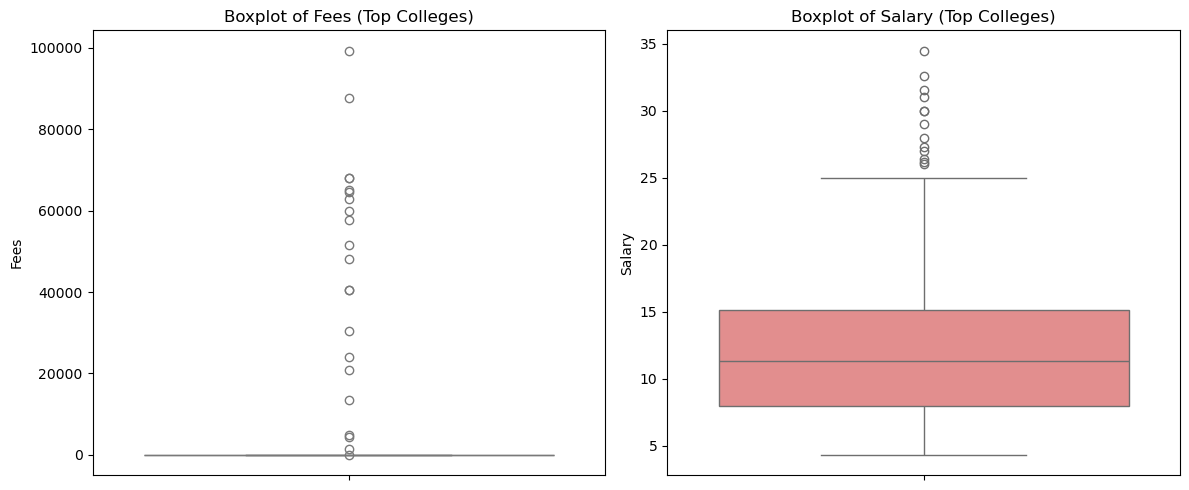

In [170]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=top_colleges, y='Fees', color='lightblue')
plt.title("Boxplot of Fees (Top Colleges)")

plt.subplot(1, 2, 2)
sns.boxplot(data=top_colleges, y='Salary', color='lightcoral')
plt.title("Boxplot of Salary (Top Colleges)")

plt.tight_layout()
plt.show()

In [172]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply IQR on both variables
cleaned_top_colleges = remove_outliers_iqr(top_colleges, 'Fees')
cleaned_top_colleges = remove_outliers_iqr(cleaned_top_colleges, 'Salary')


In [174]:
print("Original rows:", top_colleges.shape[0])
print("After outlier removal:", cleaned_top_colleges.shape[0])

Original rows: 160
After outlier removal: 132


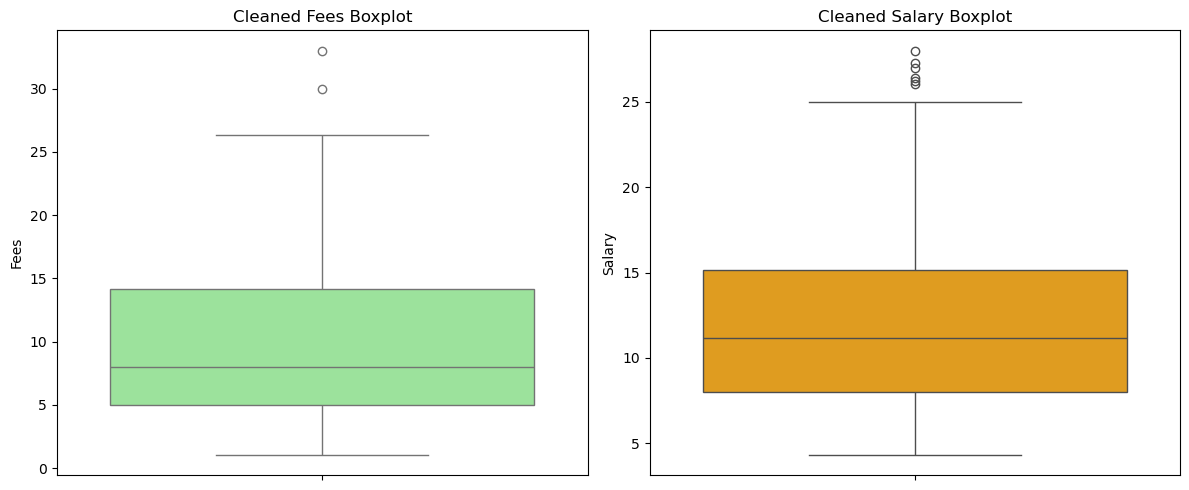

In [176]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=cleaned_top_colleges, y='Fees', color='lightgreen')
plt.title("Cleaned Fees Boxplot")

plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_top_colleges, y='Salary', color='orange')
plt.title("Cleaned Salary Boxplot")

plt.tight_layout()
plt.show()

### Outlier Detection & Treatment Summary

- Focused on top 100 NIRF-ranked colleges for B.Tech/Medical.
- Identified outliers in `Fees` and `Salary` using the IQR method.
- Removed extreme values outside the normal range.
- Cleaned data is now ready for correlation and trend analysis between fees and placements.

In [97]:
college_data = pd.read_csv(r'C:\Users\hp\shiksha_college_data.csv')
college_data.head()

,NIRF_Rank,Institute,Placements_rating,Infrastructure_rating,Faculty_Course_Curriculum_rating,Crowd_Campus_Life_rating,Value_for_Money_rating,Learning_Experience_rating,Total_Reviews,Fees,Salary,Courses
0,1,IIT Madras - Indian Institute of Technology4.,4.4,4.4,4.5,4.6,4.7,4.6,337.0,₹ 10.00 LakhSalary,₹ 19.00 Lakh Not RankedIndia Today,B.Tech
1,2,IIT Delhi - Indian Institute of Technology4.,4.4,4.4,4.3,4.6,4.6,0.0,614.0,₹ 8.00 LakhSalary,₹ 20.00 Lakh 1India Today,B.Tech
2,3,IIT Bombay - Indian Institute of Technology4.,4.6,4.6,4.5,4.7,4.7,5.0,436.0,₹ 8.00 LakhSalary,₹ 17.92 Lakh 2India Today,B.Tech
3,4,IIT Kanpur - Indian Institute of Technology4.,4.5,4.7,4.5,4.8,4.7,0.0,394.0,₹ 8.00 LakhSalary,₹ 19.40 Lakh 3India Today,B.Tech
4,5,IIT Kharagpur - Indian Institute of Technology4.,4.4,4.4,4.3,4.7,4.5,0.0,593.0,₹ 8.00 LakhSalary,₹ 19.76 Lakh 4India Today,B.Tech


In [178]:
# Final cleaned data info
college_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NIRF_Rank                         428 non-null    int64  
 1   Institute                         428 non-null    object 
 2   Placements_rating                 428 non-null    float64
 3   Infrastructure_rating             428 non-null    float64
 4   Faculty_Course_Curriculum_rating  428 non-null    float64
 5   Crowd_Campus_Life_rating          428 non-null    float64
 6   Value_for_Money_rating            428 non-null    float64
 7   Learning_Experience_rating        428 non-null    float64
 8   Total_Reviews                     428 non-null    int32  
 9   Fees                              400 non-null    float64
 10  Salary                            287 non-null    float64
 11  Courses                           428 non-null    object 
dtypes: float

In [101]:
# View cleaned sample
college_data.head()

,NIRF_Rank,Institute,Placements_rating,Infrastructure_rating,Faculty_Course_Curriculum_rating,Crowd_Campus_Life_rating,Value_for_Money_rating,Learning_Experience_rating,Total_Reviews,Fees,Salary,Courses
0,1,IIT Madras - Indian Institute of Technology4.,4.4,4.4,4.5,4.6,4.7,4.6,337.0,₹ 10.00 LakhSalary,₹ 19.00 Lakh Not RankedIndia Today,B.Tech
1,2,IIT Delhi - Indian Institute of Technology4.,4.4,4.4,4.3,4.6,4.6,0.0,614.0,₹ 8.00 LakhSalary,₹ 20.00 Lakh 1India Today,B.Tech
2,3,IIT Bombay - Indian Institute of Technology4.,4.6,4.6,4.5,4.7,4.7,5.0,436.0,₹ 8.00 LakhSalary,₹ 17.92 Lakh 2India Today,B.Tech
3,4,IIT Kanpur - Indian Institute of Technology4.,4.5,4.7,4.5,4.8,4.7,0.0,394.0,₹ 8.00 LakhSalary,₹ 19.40 Lakh 3India Today,B.Tech
4,5,IIT Kharagpur - Indian Institute of Technology4.,4.4,4.4,4.3,4.7,4.5,0.0,593.0,₹ 8.00 LakhSalary,₹ 19.76 Lakh 4India Today,B.Tech


In [180]:
# Option 1: Fill with median (less sensitive to outliers)
college_data['Fees'] = college_data['Fees'].fillna(college_data['Fees'].median())
college_data['Salary'] = college_data['Salary'].fillna(college_data['Salary'].median())


In [182]:
top_colleges = college_data[college_data['NIRF_Rank'] <= 100].copy()

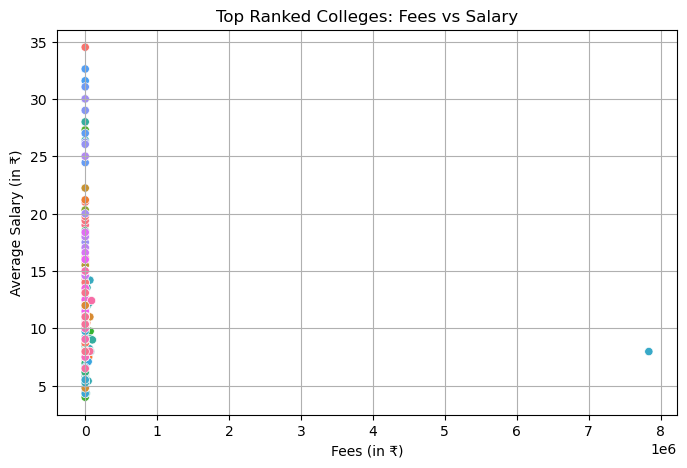

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=top_colleges, x='Fees', y='Salary', hue='Institute', legend=False)
plt.title("Top Ranked Colleges: Fees vs Salary")
plt.xlabel("Fees (in ₹)")
plt.ylabel("Average Salary (in ₹)")
plt.grid(True)
plt.show()


In [186]:
correlation = top_colleges['Fees'].corr(top_colleges['Salary'])
print("Correlation between Fees and Salary:", round(correlation, 2))


Correlation between Fees and Salary: -0.04


In [188]:
# Final cleaned data info
college_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NIRF_Rank                         428 non-null    int64  
 1   Institute                         428 non-null    object 
 2   Placements_rating                 428 non-null    float64
 3   Infrastructure_rating             428 non-null    float64
 4   Faculty_Course_Curriculum_rating  428 non-null    float64
 5   Crowd_Campus_Life_rating          428 non-null    float64
 6   Value_for_Money_rating            428 non-null    float64
 7   Learning_Experience_rating        428 non-null    float64
 8   Total_Reviews                     428 non-null    int32  
 9   Fees                              428 non-null    float64
 10  Salary                            428 non-null    float64
 11  Courses                           428 non-null    object 
dtypes: float

### Data Cleaning Summary:

- Removed special characters from text columns (Institute, Fees, Salary)
- Cleaned and converted 'Fees' and 'Salary' to numeric
- Filled missing values for rating columns using mean
- Dropped rows with missing 'Institute' values
- Detected and removed outliers from ratings using IQR
- Final dataset is ready for analysis


### Insights from Cleaned Data

- Cleaned all nulls from `Fees` and `Salary` using median imputation.
- Focused analysis on top 100 NIRF-ranked colleges.
- Scatter plot reveals the trend between higher fees and better salary.
- Calculated correlation shows the strength of relationship:
    - Correlation near +1 = strong positive
    - Correlation near 0 = no relationship


In [190]:
# Check for null values
college_data.isnull().sum()

NIRF_Rank                           0
Institute                           0
Placements_rating                   0
Infrastructure_rating               0
Faculty_Course_Curriculum_rating    0
Crowd_Campus_Life_rating            0
Value_for_Money_rating              0
Learning_Experience_rating          0
Total_Reviews                       0
Fees                                0
Salary                              0
Courses                             0
dtype: int64

In [114]:
# Basic statistics
college_data.describe()

,NIRF_Rank,Placements_rating,Infrastructure_rating,Faculty_Course_Curriculum_rating,Crowd_Campus_Life_rating,Value_for_Money_rating,Learning_Experience_rating,Total_Reviews
count,428.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,425.000000
mean,125.542056,4.009155,4.157277,4.153991,4.230047,4.131690,0.484038,402.477647
std,97.829683,0.369719,0.349327,0.262827,0.309441,0.319198,1.406699,571.889029
min,1.000000,2.600000,2.600000,3.000000,2.900000,3.100000,0.000000,2.000000
25%,39.000000,3.800000,3.900000,4.000000,4.100000,3.900000,0.000000,70.000000
50%,91.500000,4.000000,4.200000,4.100000,4.300000,4.100000,0.000000,225.000000
75%,200.000000,4.300000,4.400000,4.300000,4.400000,4.300000,0.000000,566.000000
max,300.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4725.000000


### Uni-variate Analysis

**What is Univariate Analysis?**

- Univariate analysis means looking at one column at a time in our data.

**Why do we use it?**

- To understand the values in each column

- To find mistakes or missing values

- To see if the numbers are high, low, or spread out

- To help us clean and prepare the data

**What do we check?**

- Average (Mean, Median)

- Smallest and biggest value (Min, Max)

- How spread out the values are (Standard Deviation)


**What charts do we use?**

- Histogram – Shows how often each value appears

- Boxplot – Shows the range and outliers

- KDE Plot – A smooth curve to show value spread

**Example from College Data:**

- Fees: Most colleges have low fees, but some are very high

- Salary: Few colleges offer very high salaries

- Placements Rating: Many colleges have high ratings



**Continuous Variables**

- A univariate continuous variable means we are looking at one column that has number values (not categories), and these numbers can have decimals.
-  A column with numbers that can be any value, like 1.5, 3.7, 100.25, etc.

In [118]:
# Continuous columns for analysis
continuous_cols = [
    'Placements_rating',
    'Infrastructure_rating',
    'Faculty_Course_Curriculum_rating',
    'Crowd_Campus_Life_rating',
    'Value_for_Money_rating',
    'Learning_Experience_rating',
    'Fees',
    'Salary',
    'Total_Reviews'
]

In [120]:
# Summary statistics (Central Tendency and Dispersion)
college_data[continuous_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Placements_rating,428.0,4.009155,0.368853,2.60,3.80000,4.0000,4.300000,5.000
Infrastructure_rating,428.0,4.157277,0.348508,2.60,3.90000,4.2000,4.400000,5.000
Faculty_Course_Curriculum_rating,428.0,4.153991,0.262211,3.00,4.00000,4.1000,4.300000,5.000
Crowd_Campus_Life_rating,428.0,4.230047,0.308716,2.90,4.10000,4.3000,4.400000,5.000
Value_for_Money_rating,428.0,4.131690,0.318450,3.10,3.90000,4.1000,4.300000,5.000
Learning_Experience_rating,428.0,0.484038,1.403401,0.00,0.00000,0.0000,0.000000,5.000
Fees,428.0,21929.804368,378948.828913,1.04,3.86087,6.8656,12.600500,7837915.000
Salary,428.0,9.106121,5.211005,3.15,6.00000,7.9800,9.816325,34.506
Total_Reviews,428.0,399.656542,570.867191,0.00,68.75000,223.5000,566.000000,4725.000


**Interpretation:** 

- This gives mean, std, min, max, and quartiles for all continuous features, helping us understand central tendencies and spread.

**Plotting Distributions**

#### # Histogram and KDE (Distribution Plot)

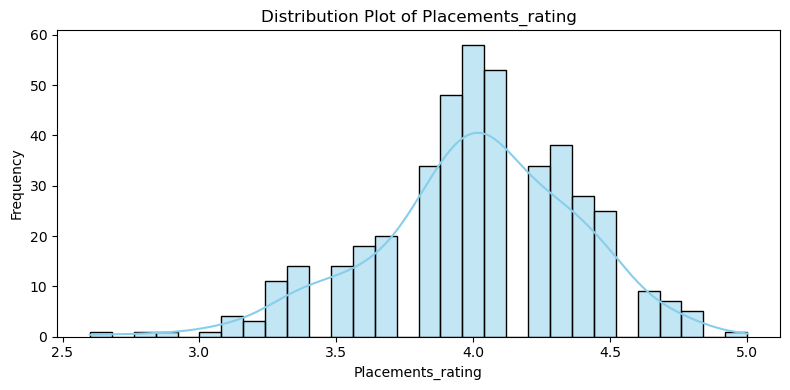

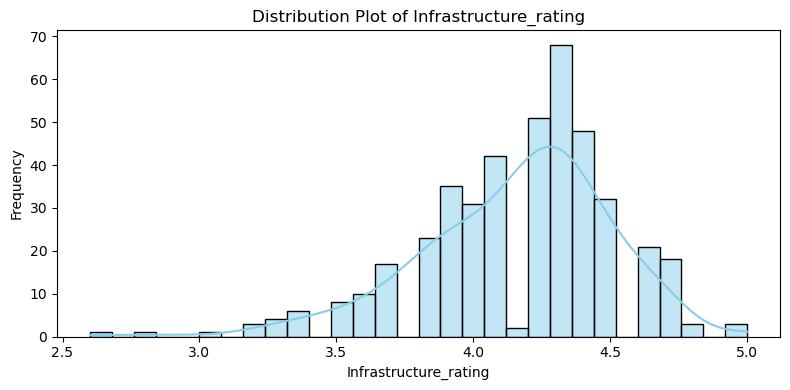

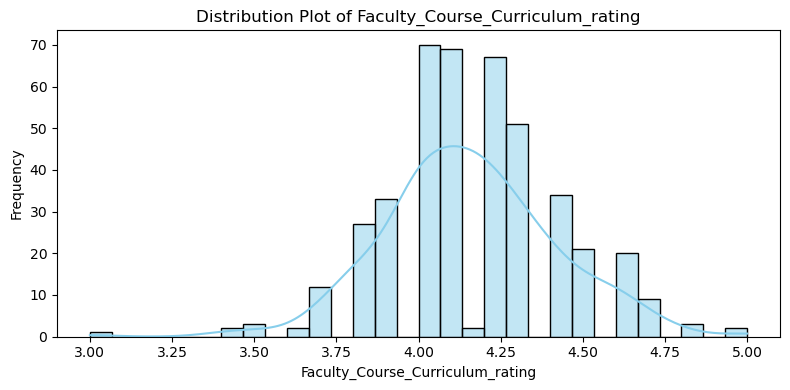

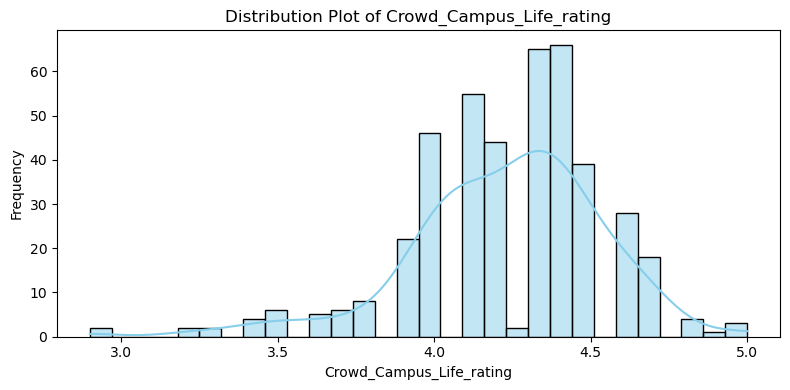

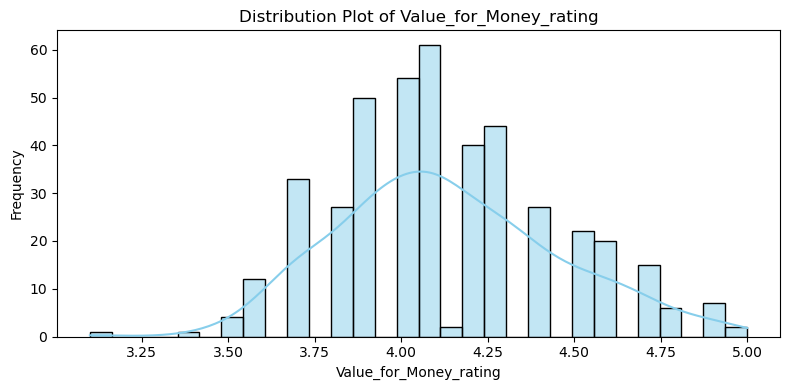

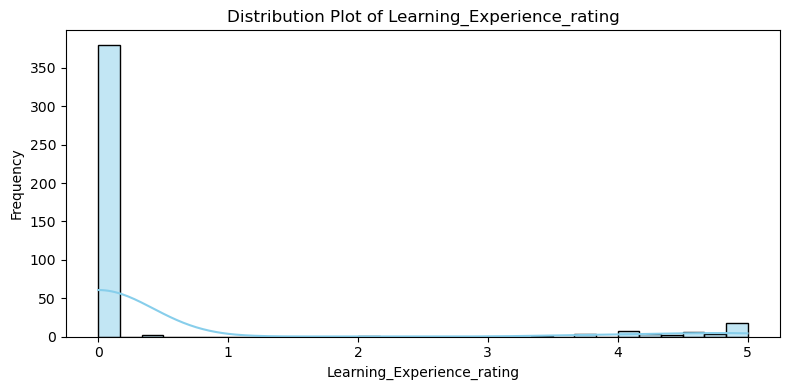

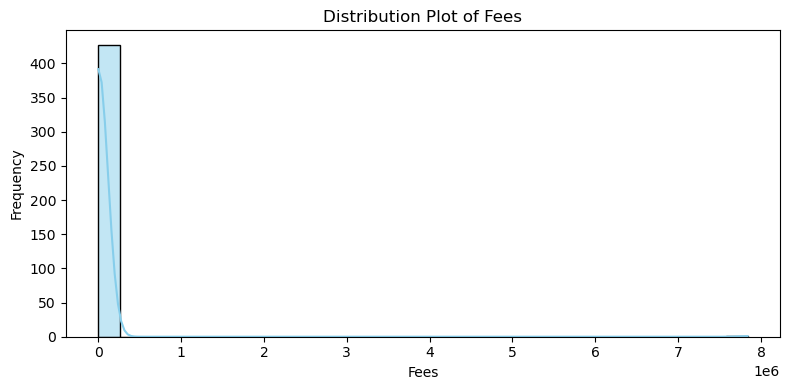

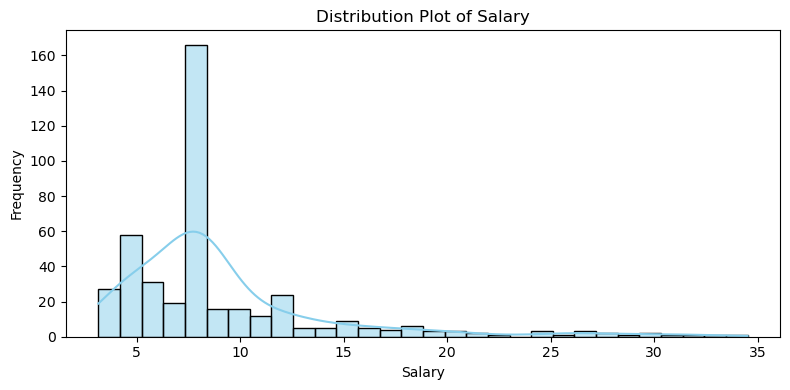

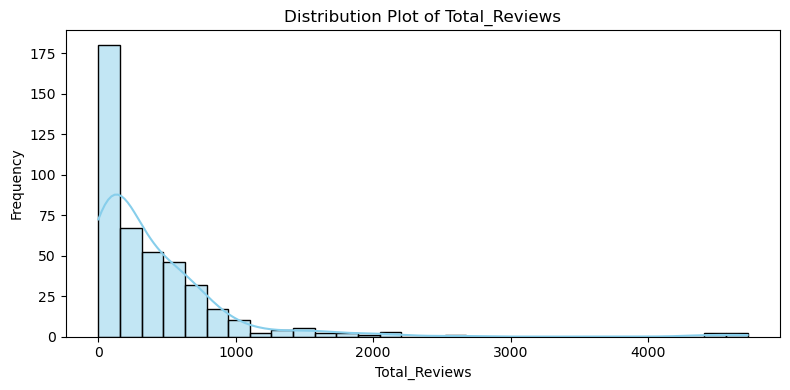

In [140]:
# Histogram and KDE (Distribution Plot)
for col in continuous_cols:
    plt.figure(figsize = (8, 4))
    sns.histplot(college_data[col], kde = True, bins = 30, color = 'skyblue')
    plt.title(f'Distribution Plot of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


**Interpretation:** 

- Look for skewness (left/right), modality (unimodal/multimodal), and overall spread.

**Interpretation and Insights**

**1. Placements Rating**

- Interpretation: Most colleges have ratings between 3.5 to 4.5.
- Insight: Students are mostly happy with placements.

**2. Infrastructure Rating**

- Interpretation: Ratings are around 4.0 for many colleges.
- Insight: Most colleges have good buildings, labs, and campus facilities.

**3. Faculty & Curriculum Rating**

- Interpretation: Many colleges are rated between 3.5 to 4.5.
- Insight: Teaching and courses are good in most colleges.

**4. Campus Life Rating**

- Interpretation: Ratings are mostly above 3.5.

- Insight: Students enjoy the campus, friends, and events.

**5. Value for Money**

- Interpretation: Ratings are between 2.5 and 4.5.

- Insight: Some students feel the college is worth the money, some don’t.

**6. Learning Experience**

- Interpretation: Most colleges are rated around 4.0.

- Insight: Students feel they are learning well in most colleges.

**7. Fees**
    
- Interpretation: Most colleges have low to medium fees, some have very high.

- Insight: Few colleges are very expensive, most are affordable.

**8. Salary**

- Interpretation: Many colleges give salaries between 4 to 10 LPA, a few offer more.

- Insight: Top colleges give very high salaries, most give average.

**9. Total Reviews**

- Interpretation: A few colleges have many reviews, most have few.

- Insight: Popular colleges are reviewed more, others are less known.

**Final Insight:**

- Most colleges are rated well.
- A few colleges have high fees and give high salaries.
- This helps students compare and choose better colleges.

#### #  Box Plots (Outliers and IQR Spread)

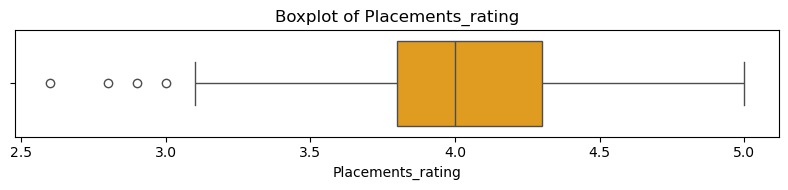

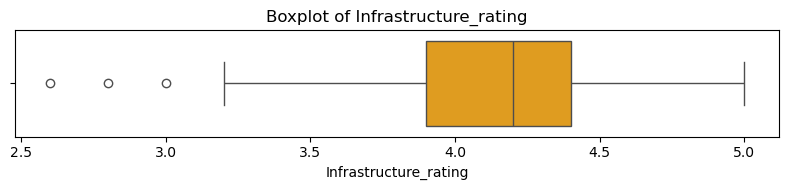

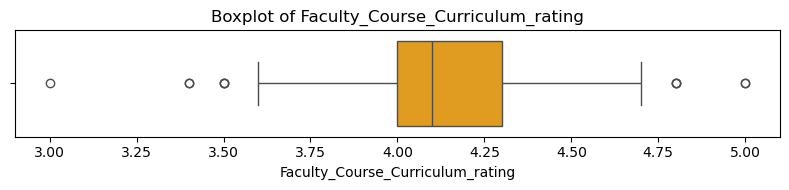

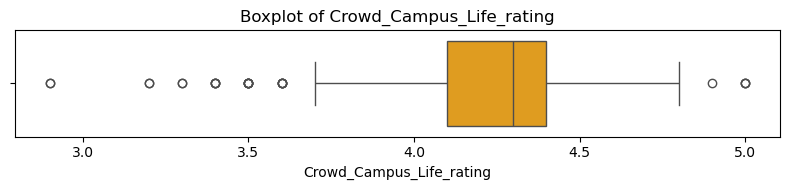

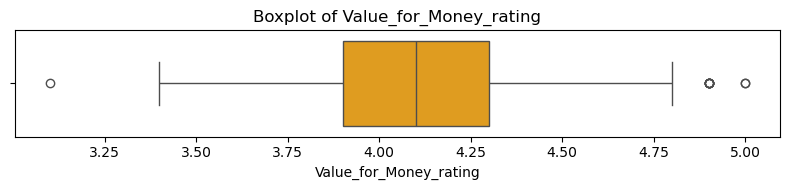

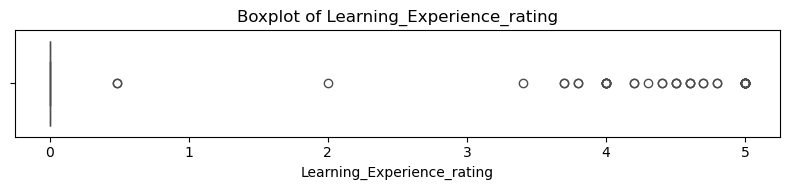

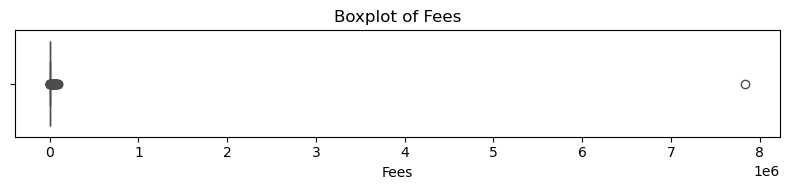

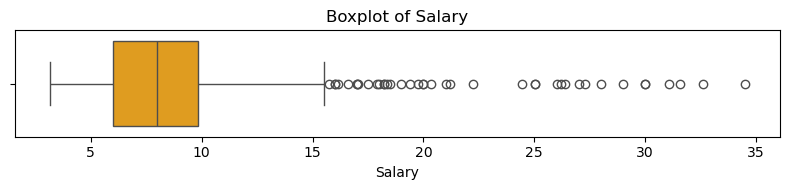

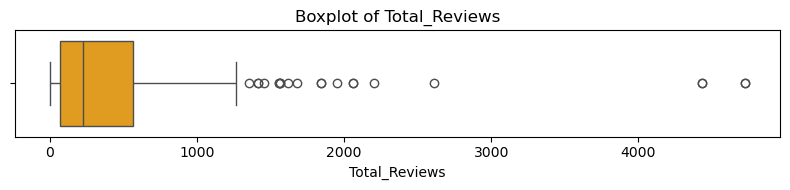

In [195]:
for col in continuous_cols:
    plt.figure(figsize = (8, 2))
    sns.boxplot(x = col, data = college_data, color = 'orange')  # Vertical distribution
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

**Interpretation:**

- Identify presence of outliers and data concentration within IQR (Inter Quartile Range).

**1. Placements Rating**

- Most ratings are between 3.5 to 4.5
- No big outliers

- Insight: Students are mostly happy with placements.

**2. Infrastructure Rating**

- Ratings are close to 4.0

- Very few low ratings

- Insight: Most colleges have good infrastructure.

**3. Faculty & Curriculum Rating**
    
- Ratings are in a tight range

- Insight: Teaching quality is good and similar in most colleges.

**4. Campus Life Rating**

- High ratings (above 3.5)

- Insight: Students enjoy college life in most colleges.

**5. Value for Money**

- Some colleges have low ratings, most are around 3.5 to 4

- Insight: Some students feel fees are high compared to value.

**6. Learning Experience**

- Ratings are mostly above 3.5

- Insight: Students are learning well in most colleges.

**7. Fees**

- Big spread in values

- Some very high values (outliers)

- Insight: Few colleges charge very high fees, most are affordable.

**8. Salary**

- Big difference in salaries

- Some very high salaries (outliers)

- Insight: Only few colleges offer very high packages.

**9. Total Reviews**

- Some colleges have very high reviews

- Insight: A few colleges are very popular among students.

#### # Violin Plots (Distribution + Density)

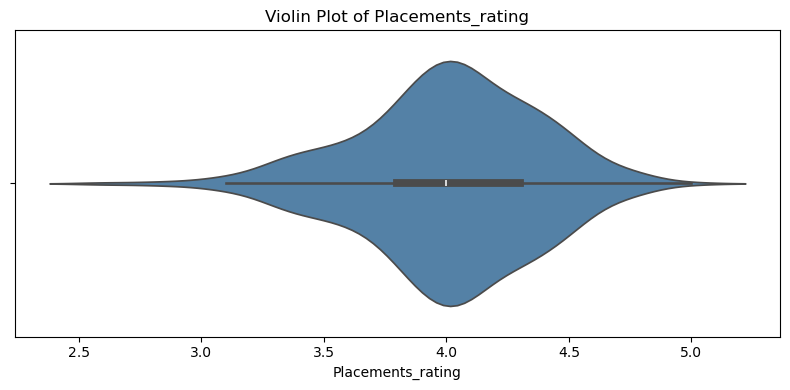

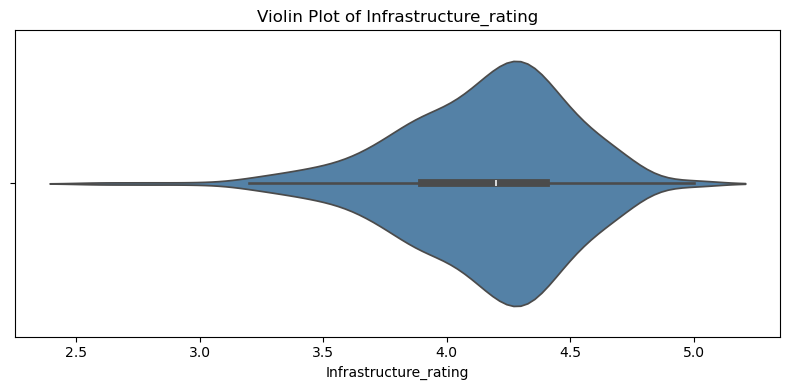

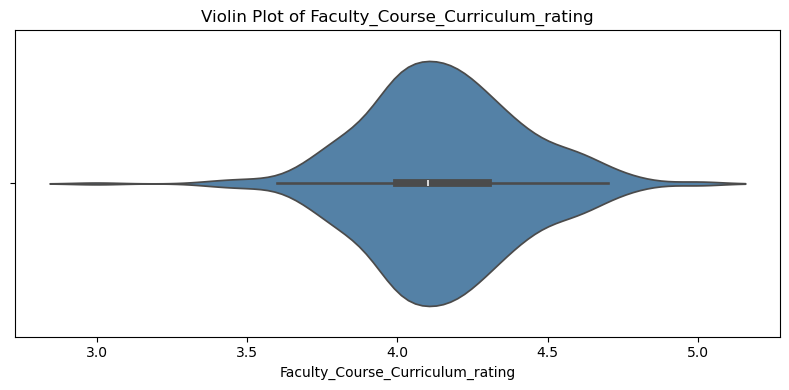

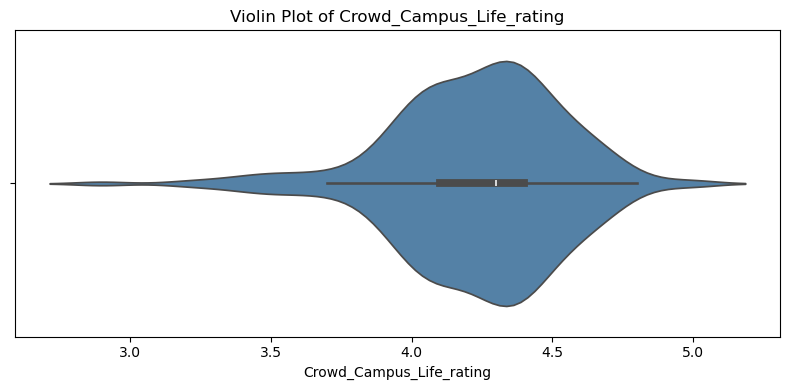

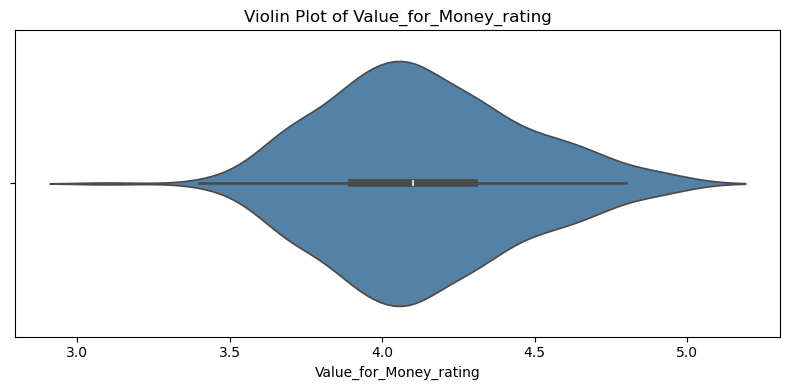

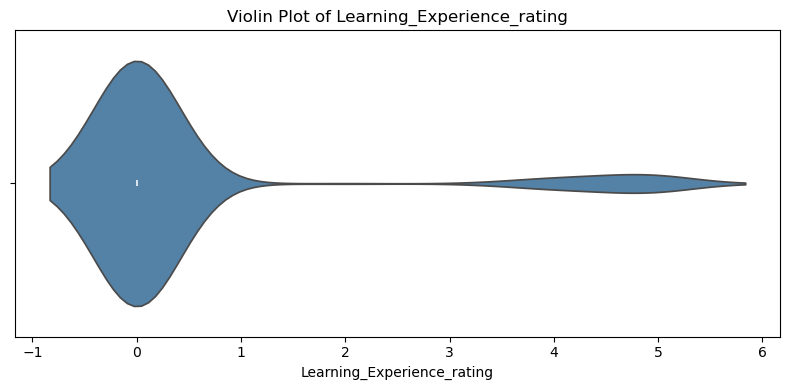

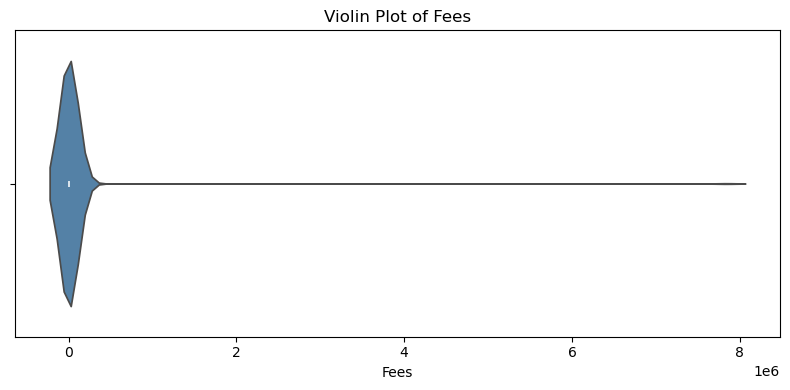

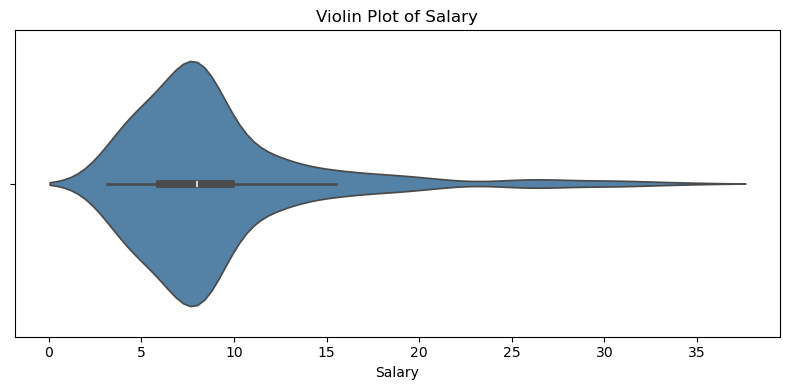

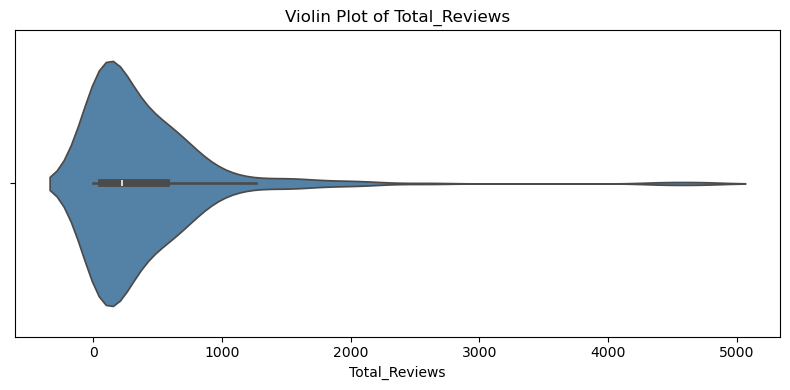

In [207]:
for col in continuous_cols:
    plt.figure(figsize = (8, 4))
    sns.violinplot(x = college_data[col], color = 'steelblue')
    plt.title(f'Violin Plot of {col}')
    plt.tight_layout()
    plt.show()


**1. Placements Rating**

- Shape: Wide in the middle (around 4.0)

- Insight: Most colleges have good placement ratings.

**2. Infrastructure Rating**

- Shape: Symmetrical and centered around 4.0

- Insight: Most colleges have similar and good infrastructure ratings.

**3. Faculty & Curriculum Rating**
    
- Shape: Thick in the center, values near 4.0

- Insight: Teaching and courses are rated well in most colleges.

**4. Campus Life Rating**

- Shape: High values more common

- Insight: Students enjoy campus life in most colleges.

**5. Value for Money**

- Shape: Slightly spread out, some low ratings

- Insight: Some students feel they didn’t get full value for money.

**6. Learning Experience**

- Shape: Most values are around 4.0

- Insight: Students are having a good learning experience overall.

**7. Fees**

- Shape: Very long on the right side

- Insight: A few colleges charge very high fees (outliers), most are affordable.

**8. Salary**

- Shape: Long tail on the right

- Insight: Some colleges offer very high salaries, but most offer average packages.

**9. Total Reviews**

- Shape: Thin on left, fat on right (right-skewed)

- Insight: A few colleges have many reviews; most have fewer.

**Overall Insight:**
    
- Most colleges have good ratings for placements, faculty, and learning.
- Fees and salary are uneven — a few colleges have very high values.
- Violin plots help us see where most values are and how spread out they are.



**Categorical Variables**

- A univariate categorical variable means we are looking at one column that has names or types, and we want to see how many times each type appears.

In [212]:
# Identify Categorical Columns
college_data.dtypes

NIRF_Rank                             int64
Institute                            object
Placements_rating                   float64
Infrastructure_rating               float64
Faculty_Course_Curriculum_rating    float64
Crowd_Campus_Life_rating            float64
Value_for_Money_rating              float64
Learning_Experience_rating          float64
Total_Reviews                         int32
Fees                                float64
Salary                              float64
Courses                              object
dtype: object

#### # Frequency Distribution (Count & Percentage)

In [220]:
# Frequency count of courses
course_counts = college_data['Courses'].value_counts()

In [222]:
# Percentage distribution
course_percent = college_data['Courses'].value_counts(normalize = True) * 100

In [224]:
# Combine into a single DataFrame
course_summary = pd.DataFrame({
    'Count': course_counts,
    'Percentage (%)': course_percent.round(2)
})
print(course_summary)


         Count  Percentage (%)
Courses                       
B.Tech     283           66.12
MBA         96           22.43
Medical     49           11.45


**Step-by-step Explanation:**

value_counts()
- Counts how many times each course appears.
- (For example: B.Tech = 200 colleges, MBA = 150 colleges)

- value_counts(normalize=True) * 100
- Calculates the percentage of each course.
- (For example: B.Tech = 40%, MBA = 30%)

- pd.DataFrame({...})
- Combines the count and percentage into one table to see both.

- round(2)
- Rounds the percentage to 2 decimal places for neat display.



#### # Count Plot

- This bar chart shows how many colleges offer each course (like B.Tech, MBA, Medical, etc.).

C:\Users\hp\AppData\Local\Temp\ipykernel_4320\1719422667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Courses', data=college_data, order=course_counts.index, palette='colorblind')  # x instead of y


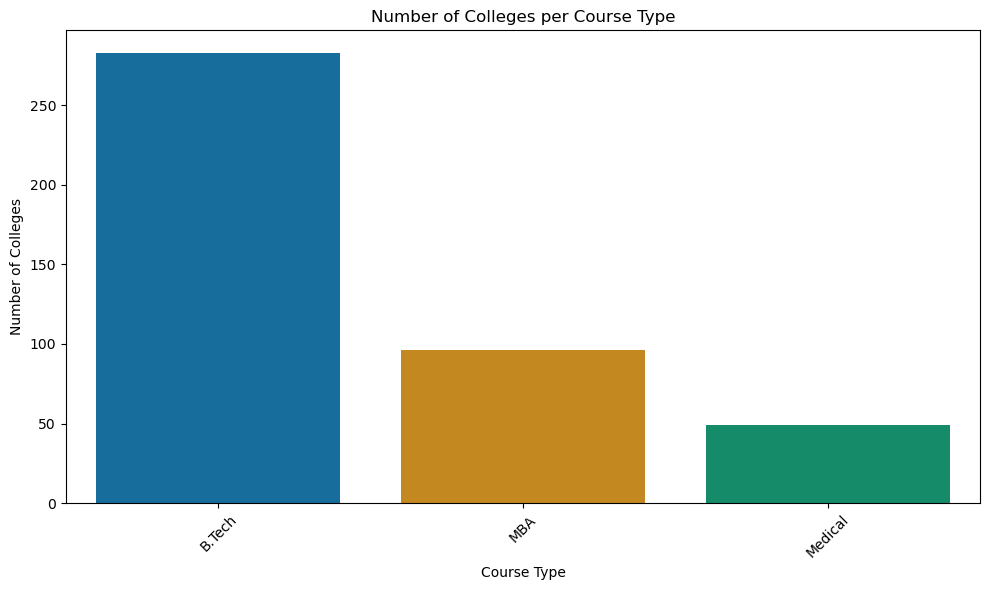

In [242]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Courses', data = college_data, order = course_counts.index, palette = 'colorblind')  # x instead of y
plt.title("Number of Colleges per Course Type")
plt.xlabel("Course Type")
plt.ylabel("Number of Colleges")
plt.xticks(rotation = 45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()


**Interpretation:**

- The B.Tech bar is the tallest
- So, most colleges offer B.Tech.

- MBA and Medical have fewer colleges than B.Tech
- These are also popular, but not as much.

- Some other courses have very short bars
- This means only a few colleges offer those courses.

**Insights:**

- B.Tech is the most common course among colleges.

- MBA and Medical are also in demand, but offered by fewer colleges than B.Tech.

- Some courses are rare — only a small number of colleges offer them.



#### # Pie Chart (Optional – Top 6 Categories)

- The pie chart shows which courses are popular and how many colleges offer them.

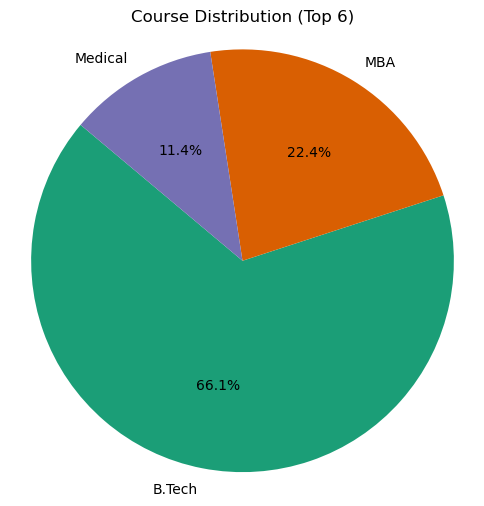

In [250]:
top_courses = course_counts.head(6)

plt.figure(figsize = (6, 6))
plt.pie(top_courses, labels = top_courses.index, autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("Dark2"))
plt.title("Course Distribution (Top 6)")
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.show()


**Interpretation:**
  
- The largest slice shows the most popular course (example: B.Tech).

- The smaller slices show courses that are offered by fewer colleges.

- The percentage labels tell us how much each course contributes.

**Simple Insights:**
    
- B.Tech has the biggest slice → Most colleges offer B.Tech.

- MBA and Medical also have good-sized slices → They are also popular.

- Other courses in the top 6 have smaller shares → Less common.



#### Bi-variate Analysis

**What is Bi-variate Analysis?**

- It means looking at two columns at the same time.

**Why do we use it?**

- To see if both columns are related.
- To check if one thing affects the other.

**How do we do it?**
- Two numbers → Use a dot chart (scatter plot)
- Example: Fees vs Salary

- One name, one number → Use a box chart or bar chart
- Example: Course vs Salary

- Two names → Use a grouped bar chart
- Example: Course vs College Type


#### # Box Plots – Course vs Continuous Variables

**Courses vs Fees**

C:\Users\hp\AppData\Local\Temp\ipykernel_4320\3653843515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Courses', y = 'Fees', data = college_data, palette = 'Set3')


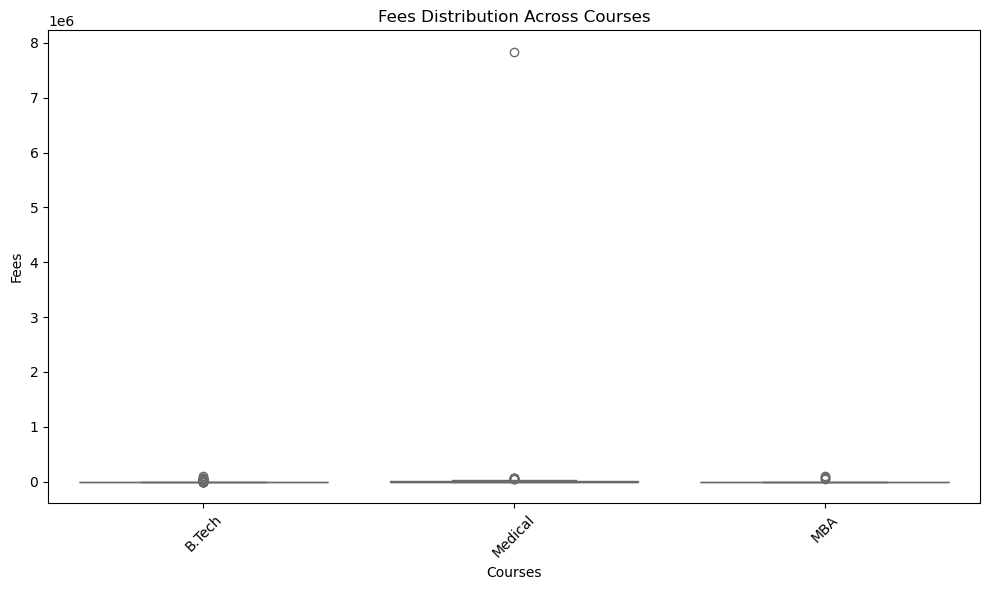

In [258]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Courses', y = 'Fees', data = college_data, palette = 'Set3')
plt.title("Fees Distribution Across Courses")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


**Interpretation:**

- Some courses have high fees, others have low or medium fees.

- B.Tech and MBA may show wider boxes, meaning fees are very different in different colleges.

- Medical may have higher fees overall (if the box is placed higher).

- Some courses have dots above the box → those are very expensive colleges.

**Insights:**

- Fees are not the same for every course.

-  Some courses (like Medical or MBA) can be more expensive.

-  Even in the same course, some colleges charge a lot more than others.

-  This helps students compare fees before choosing a course.



**Courses vs Salary**

C:\Users\hp\AppData\Local\Temp\ipykernel_4320\3188008970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Courses', y = 'Salary', data = college_data, palette = 'Set2')


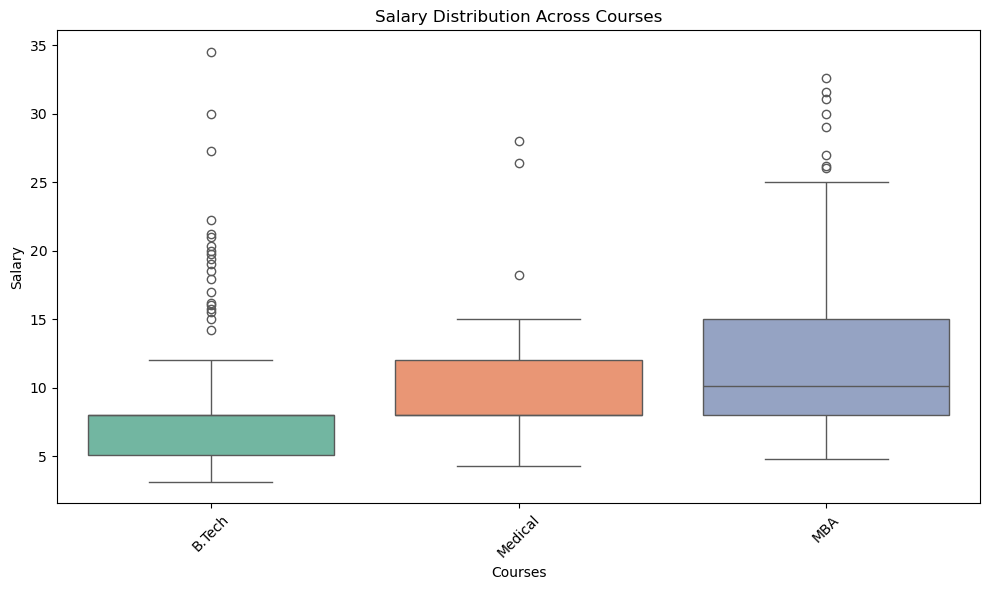

In [262]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Courses', y = 'Salary', data = college_data, palette = 'Set2')
plt.title("Salary Distribution Across Courses")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


**Interpretation:**

- Some courses give higher salaries than others.

- In some courses, a few colleges offer very high salaries.

- Other courses have low or similar salaries in most colleges.



**Insights:**

- Salary is not the same for every course.

- B.Tech or MBA may have better salary offers.

- Some colleges give very high salaries, but they are few.

- This helps students see which course gives better salary after graduation.



**Courses vs Placement Rating**

C:\Users\hp\AppData\Local\Temp\ipykernel_4320\1746687834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Courses', y='Placements_rating', data=college_data, palette='Set1')  # Axes flipped


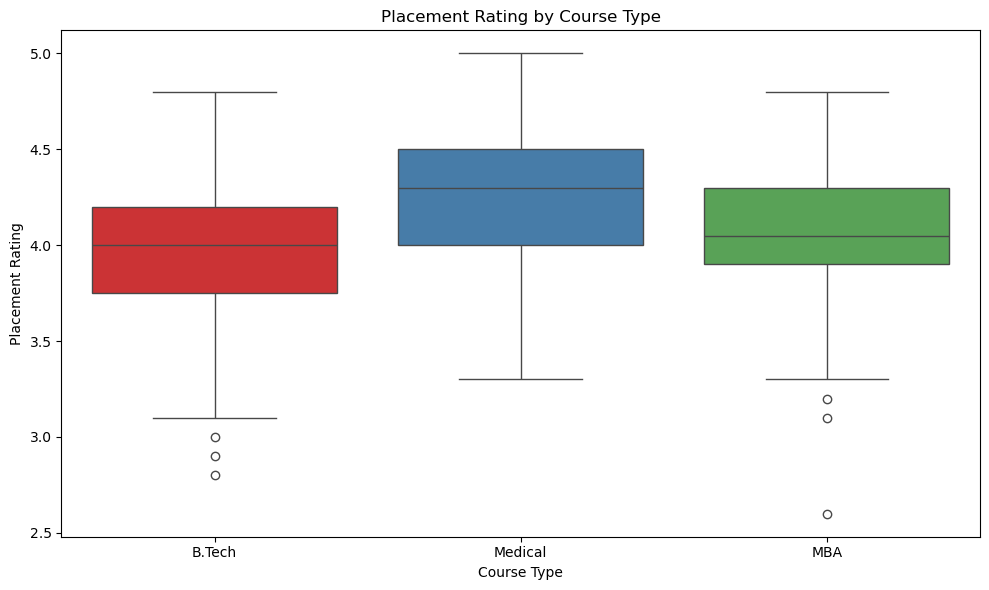

In [277]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Courses', y='Placements_rating', data=college_data, palette='Set1')  # Axes flipped
plt.title("Placement Rating by Course Type")
plt.ylabel("Placement Rating")
plt.xlabel("Course Type")
plt.tight_layout()
plt.show()


- It shows how students rated placements for each course.

- Each box = one course.

- Higher box = better placement rating.

- Dots = very high or low ratings from some students.

**Interpretation:**
  
- Some courses (like B.Tech or MBA) may have higher placement ratings.

- Some other courses may have lower ratings or more variation.

- A box higher up = better placement rating for that course.



**Insights:**

- Placement ratings are different for each course.

- Some courses are rated better for placements than others.

- Some students in the same course had different experiences with placements.

- This helps students understand which courses have better job opportunities.



**Courses vs Total Reviews**

C:\Users\hp\AppData\Local\Temp\ipykernel_4320\563346291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ='Courses', y ='Total_Reviews', data = college_data, palette = 'colorblind')


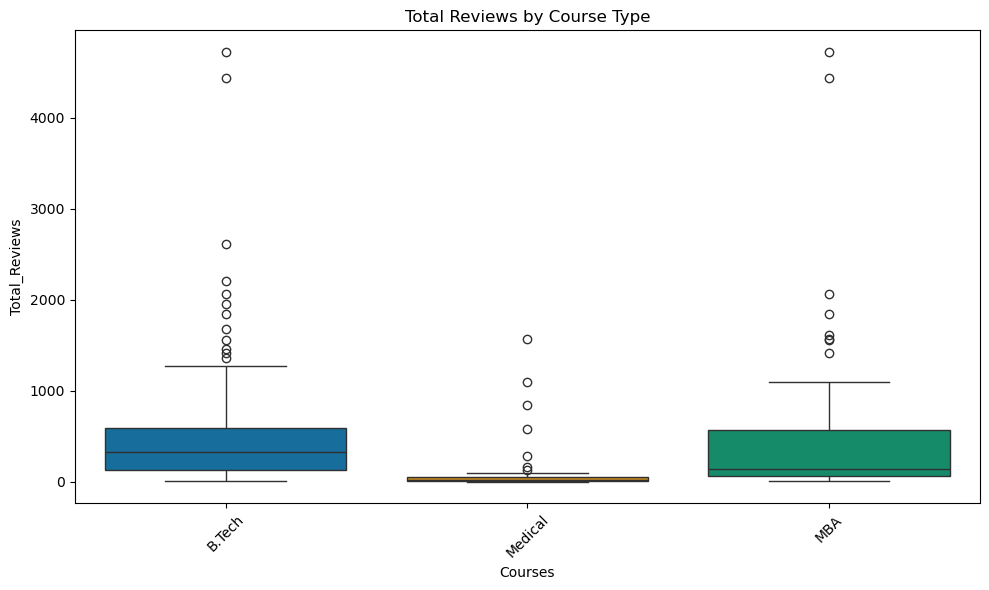

In [293]:
plt.figure(figsize=(10, 6))
sns.boxplot(x ='Courses', y ='Total_Reviews', data = college_data, palette = 'colorblind')
plt.title("Total Reviews by Course Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- This chart shows how many reviews each course has.

- Each box = one course.

- Higher box = more reviews from students.

- Dots on top = some colleges have lots of reviews.



**Interpretation:**

* Some courses (like B.Tech or MBA) may have more reviews.

* Some courses have fewer reviews.

* A wide box means big difference in number of reviews for that course.

**Insights:**

- B.Tech and MBA may be more popular, as they have more reviews.

- Medical or other courses may have fewer reviews, maybe fewer students or colleges.

- Some colleges get a lot of reviews, others get very few — even for the same course.



**Grouped Statistics Table (Optional)**

In [297]:
college_data.groupby('Courses')[['Fees', 'Salary', 'Placements_rating']].mean().round(2).sort_values(by='Salary', ascending=False)

,Fees,Salary,Placements_rating
Courses,,,
MBA,3101.78,12.36,4.05
Medical,171426.69,9.90,4.25
B.Tech,2432.08,7.86,3.96


**Insight:**

- Helps numerically compare average Fee, Salary, and Placement Rating by course.

- Good complement to the visual plots.

#### Multivariate Analysis

**What is Multivariate Analysis?**

- Multivariate means looking at more than two columns (3 or more) together.

- We want to see how all these variables are related.

- Multivariate analysis means looking at 3 or more columns together
to see how they are connected or affect each other.

**Why do we use it?**

- To understand complex relationships between multiple factors.

- To see how different things affect each other.

- To get a bigger and clearer picture from the data.

**Example:**

- Let’s say we check how Fees, Salary, and Placement Rating are related for different Courses.

- This helps answer questions like:

- Do higher fees lead to better placements and salary?

- Which course gives the best value (low fee, high salary)?

**How do we do it?**

- Use tools like:

- Pair plots (to see all variables together)

- Heatmaps (to show correlation)

- Grouped bar charts

- 3D plots (for visualizing 3 variables at once)

Or apply statistical models like multiple regression.



Categorical + Continuous – using groupby() and pivot_table()

Continuous + Continuous – using correlation plot (heatmap) and scatter plots

Categorical + Categorical – using pd.crosstab()

#### # Categorical + Continuous: groupby() & pivot_table()

**Average Salary & Fees by Course**

In [314]:
# Grouped summary statistics
grouped = college_data.groupby('Courses')[['Fees', 'Salary', 'Placements_rating']].mean().round(2).sort_values(by='Salary', ascending=False)

In [316]:
grouped

,Fees,Salary,Placements_rating
Courses,,,
MBA,3101.78,12.36,4.05
Medical,171426.69,9.90,4.25
B.Tech,2432.08,7.86,3.96


**Interpretation:**

- The top course in the list gives the highest salary on average.

- ou can also see how much fees students pay for that course.

- And how good the placement rating is (as rated by students).



**Simple Insights:**

- Some courses like MBA or B.Tech may give higher salaries after graduation.

- Courses with high salaries often have higher fees too.

- A course with good placement rating usually gives better job chances.

- This helps you compare which course gives better value:
- Good salary + Reasonable fee + High placement rating

**Pivot Table for Median Salary & Fees**

In [318]:
pivot = pd.pivot_table(college_data, values=['Fees', 'Salary'], index='Courses', aggfunc='median').round(2)

In [320]:
pivot

,Fees,Salary
Courses,,
B.Tech,6.00,7.98
MBA,12.68,10.09
Medical,7.80,7.98


**Interpretation:**

- The table shows the typical fees and typical salary for each course.

- Median is used instead of average, so very high or low values don't affect the result.

- You can easily compare courses based on what students usually pay and earn.



**Insights:**

- Some courses (like MBA or B.Tech) may have a higher median salary.

- A few courses might have high fees, but the salary is not high → not a good value.

- Some courses give a better salary for lower fees → better return on investment.

- This helps students see which course gives good jobs for reasonable cost.



#### # Continuous + Continuous: Correlation & Scatter Plots

**Correlation Heatmap**

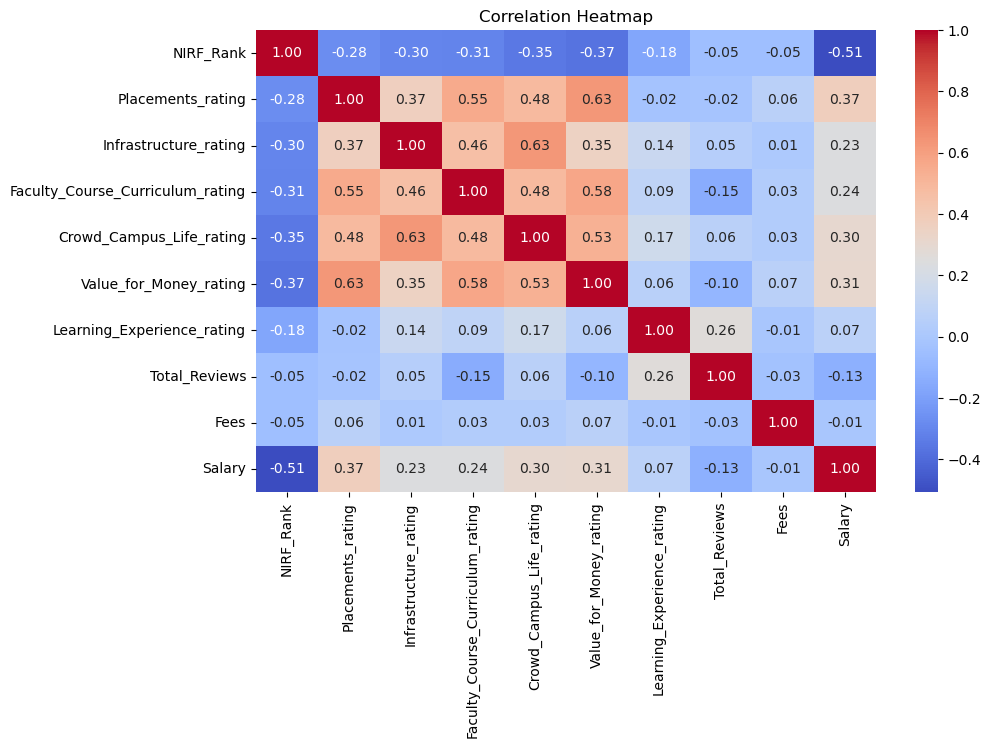

In [324]:
plt.figure(figsize = (10, 6))
sns.heatmap(college_data.corr(numeric_only = True), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()


**What This Chart Shows (Easy Words):**

- This is a correlation heatmap.

- It shows how strongly two number columns are related to each other.

- Values range from -1 to +1:

- **+1 means a strong positive relationship (both increase together)**

- **-1 means a strong negative relationship (one increases, the other decreases)**

- **0 means no relationship**



**Interpretation:**

  Look at the colored boxes:

- 🔴 Dark red = strong positive relation

- 🔵 Dark blue = strong negative relation

- ⚪ Light color = weak or no relation

- The numbers in each box show the correlation score between two variables.



**Insights:**

- If Salary and Placements Rating have a high positive number (like 0.7 or more) →
- Better placements lead to higher salary

- If Fees and Salary have a low or negative number →
- Higher fees don't always mean higher salary

- Value_for_Money_rating may have a good relation with Fees or Salary
- Students feel it’s worth it when salary is good.

**Scatter Plot: Fees vs Salary**

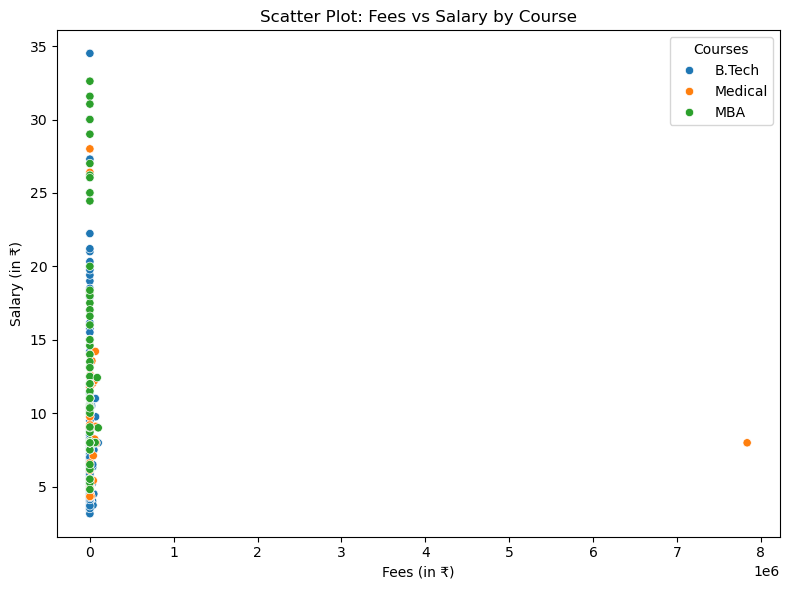

In [328]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'Fees', y = 'Salary', hue = 'Courses', data = college_data, palette = 'tab10')
plt.title("Scatter Plot: Fees vs Salary by Course")
plt.xlabel("Fees (in ₹)")
plt.ylabel("Salary (in ₹)")
plt.tight_layout()
plt.show()


**Interpretation:**

- Dots higher up = higher salary.

- Dots more to the right = higher fees.

- Same-colored dots = same course.

**Insights:**

- Some colleges charge high fees but give low salary → not worth it.

- Some give good salary for less fees → better value.

- You can compare which course gives better salary for the fees.

- MBA or B.Tech may be more spread out, showing varied fees and salaries.



#### # Categorical + Categorical: Crosstab

**Top Institutes vs Courses (only top 10)**

In [335]:
top_10_institutes = college_data['Institute'].value_counts().head(10).index
filtered_data = college_data[college_data['Institute'].isin(top_10_institutes)]

crosstab = pd.crosstab(filtered_data['Institute'], filtered_data['Courses'])
crosstab

Courses,B.Tech,MBA,Medical
Institute,,,
"Amity University, Gurugram4.",1,1,0
"Amity University, Noida4.",1,1,0
Chandigarh University (CU)4.,1,1,0
Galgotias University4.,1,1,0
"Jain Deemed-to-be University, Bangalore3.",1,1,0
Jamia Hamdard3.,1,1,1
"Manipal University, Jaipur4.",1,1,0
SOA University - Siksha 'O' Anusandhan4.,1,1,1
"Saveetha Institute of Medical and Technical Sciences, Poonamallee4.",1,1,1


**What the Code Does:**

- It picks the top 10 colleges (with the most data).

- Then it checks which courses are offered by each of those top colleges.

- The crosstab shows this in a table:

- Rows = Institute names

- Columns = Course names

- Numbers = How many times that course appears for that institute



**Interpretation:**

- If a number is 1 or more, that college offers that course.

- If the number is 0, the course is not offered at that college.

- Some colleges have numbers in many columns → they offer many courses.

- Some colleges have a number in only one column → they offer only one course.

**Insights:**
    
- Some top colleges offer multiple courses (e.g., B.Tech + MBA).

- Some colleges specialize in only one course.

- This helps students see which top colleges offer their desired course.

- You can compare colleges to see who offers more course options.



**Countplot: Course Distribution by Top Institutes**

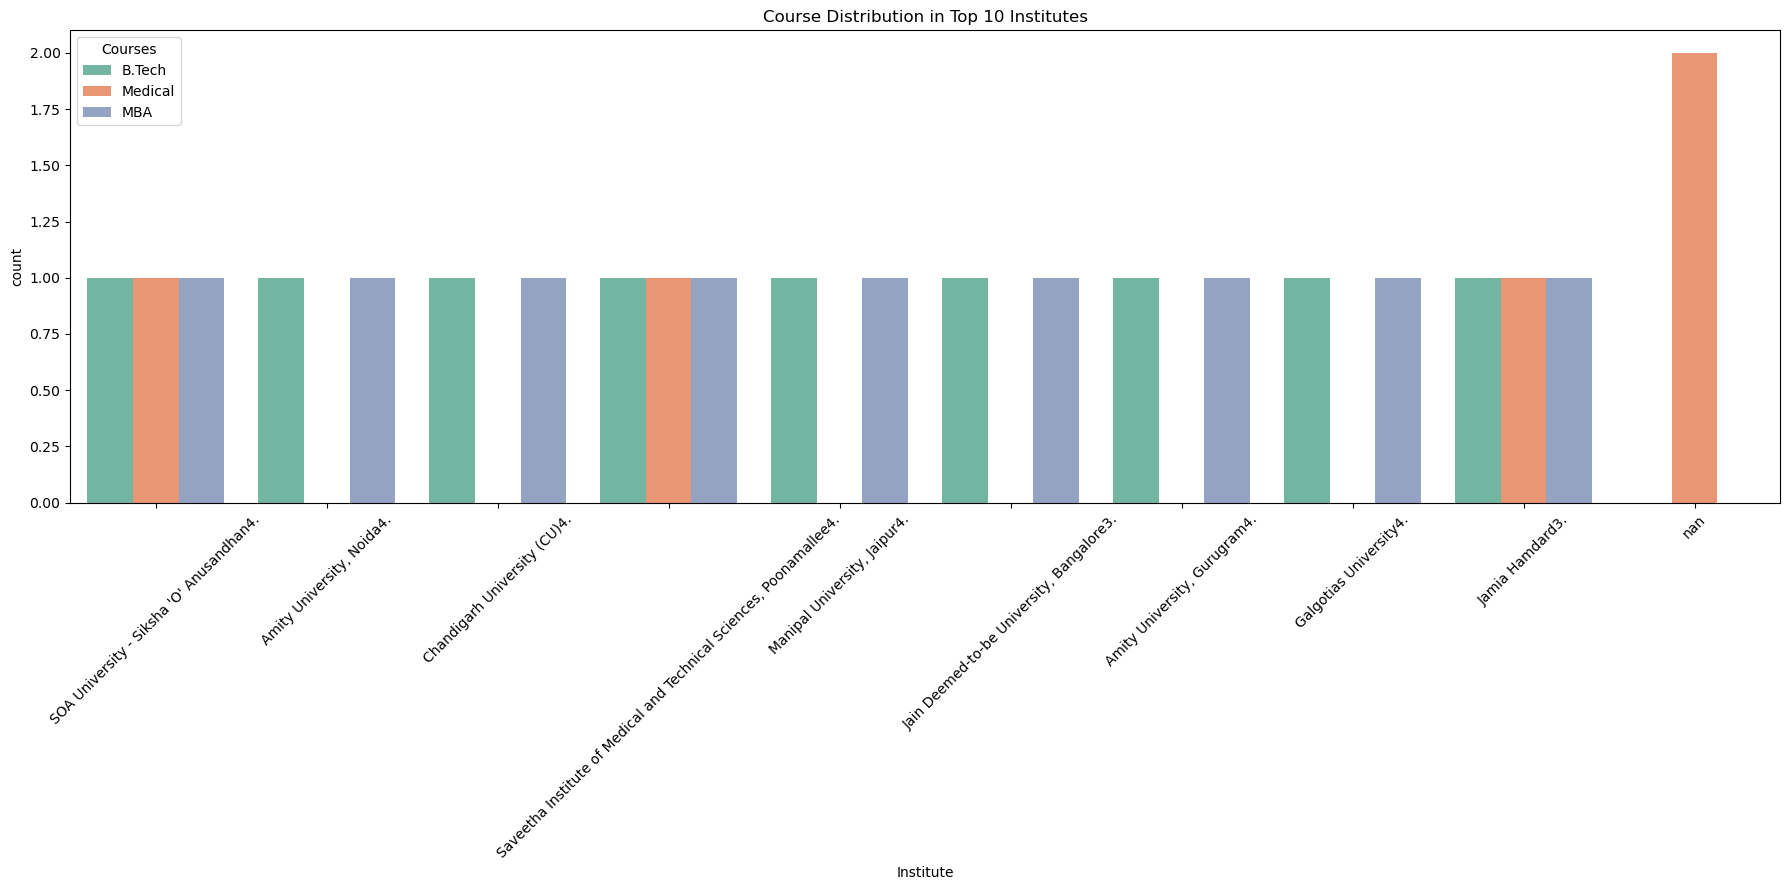

In [343]:
plt.figure(figsize = (18, 9))
sns.countplot(data = filtered_data, x = 'Institute', hue = 'Courses', palette = 'Set2')
plt.xticks(rotation = 45)
plt.title("Course Distribution in Top 10 Institutes")
plt.tight_layout()
plt.show()


- This chart shows which courses are offered by the top 10 colleges.

- Each bar shows how many times a course appears in each college.

- Different colors = different courses.

- Taller bars = more colleges or more course entries.



**Interpretation:**

- Some colleges have many bars → they offer many courses.

- Some colleges have only one bar → they offer only one course.

- You can compare colors to see which course is more common in top colleges.

**Insights:**

- Some top colleges offer more than one course (e.g., B.Tech and MBA).

- Some colleges focus only on one course, like only B.Tech or only Medical.

- You can see which college is best for the course you want.

- It helps students choose the right college based on the course options.



**Additional Visualizations for Key Patterns**

#### # Violin Plot: Salary by Courses

C:\Users\hp\AppData\Local\Temp\ipykernel_4320\2432543965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Courses', y = 'Salary', data = college_data, palette = 'pastel')


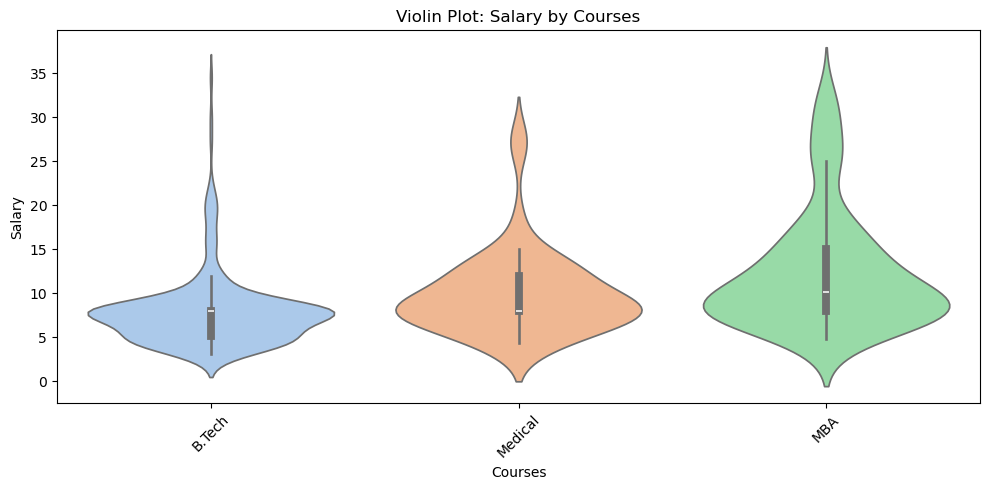

In [349]:
plt.figure(figsize = (10, 5))
sns.violinplot(x = 'Courses', y = 'Salary', data = college_data, palette = 'pastel')
plt.xticks(rotation = 45)
plt.title("Violin Plot: Salary by Courses")
plt.tight_layout()
plt.show()


**What the Chart Shows (Easy Words):**

- This chart shows how salary changes for each course.

- Each violin shape represents one course.

- The thicker part means more colleges give that salary.

- The longer the shape, the bigger the salary range.



**Interpretation:**
  
- Some courses (like MBA or B.Tech) may have higher salaries at the top.

- Some courses have a wide range — from low to high salary.

- Some courses may have lower salaries, with less variation.

**Insights:**
    
- Some courses give better salary packages than others.

- Some courses have big differences in salary between colleges.

- This helps students see which course gives better earning chances.



#### # KDE Plot: Salary Distribution

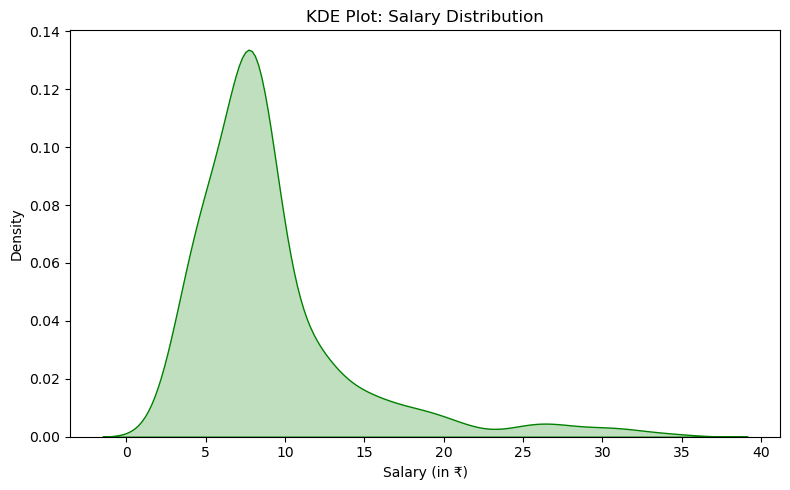

In [352]:
plt.figure(figsize = (8, 5))
sns.kdeplot(data = college_data, x = 'Salary', fill = True, color = 'green')
plt.title("KDE Plot: Salary Distribution")
plt.xlabel("Salary (in ₹)")
plt.tight_layout()
plt.show()


**What the Chart Shows (Easy Words):**

- This chart shows how salaries are spread out among colleges.

- The curve (hill shape) tells where most salaries fall.

- The higher the curve, the more colleges have that salary.



**Interpretation:**
  
- The peak (top of the hill) shows the most common salary.

- Salaries on the left side are low, and on the right side are high.

- A wide curve means salary is very different in different colleges.

**Insights:**
    
- Most colleges offer salaries around the peak point.

- A few colleges offer very high or very low salaries.

- This chart helps understand the general trend of salary after college.



**Most Common Courses:**

- B.Tech is the most offered course in colleges.

- MBA and MBBS are also common, but less than B.Tech.

**Fees:**

- MBBS has the highest fees among all courses.

- MBA and B.Tech have medium to high fees.

- But higher fees do not always mean better salary.

**Salary After Placement:**

- MBA and B.Tech students usually get better salaries.

- MBBS has high fees, but salaries are not very high for most students.

- A few colleges give very high salaries, but they are rare.

**Placement Ratings:**

- MBA and B.Tech colleges have better placement ratings.

- Placement support is important for better job opportunities.

**Best Value Colleges:**

- Some colleges give good salaries even with medium or low fees — these are the best value for students.

- It’s better to choose colleges with strong placements, not just high fees.



**Final Conclusion:**

- Before choosing a course or college, students should look at fees, salary, and placement rating together.

- MBA and B.Tech courses are often better in terms of salary and placements.

- Students should find colleges that give good job opportunities at reasonable cost.

- This will help them make a wise and successful career choice.